<a href="https://colab.research.google.com/github/Harshs-06/Datasets_MachineLearning/blob/main/Web_Scraping-Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/KOrfanakis/Web_Scraping_With_Python/blob/main/Images/02-Title_Image.png?raw=1" style="width: 600px;"/>

<br>

<p align="center">
    <a href="https://nbviewer.org/github/KOrfanakis/Web_Scraping_With_Python/blob/main/Web_Scraping-Notebook.ipynb">
        <img alt="Made with" src="https://img.shields.io/badge/Render%20with-nbviewer-orange.svg">
    </a>
    <br/>
</p>

<br>

**Table of Contents**:

* [Web Scraping](#Web-Scraping) <br>
    * [Step 1: Obtaining The HTML](#Step-1:-Obtaining-The-HTML) <br>
    * [Step 2: Parsing The HTML](#Step-2:-Parsing-The-HTML) <br>
    * [Step 3: Extracting The Data](#Step-3:-Extracting-The-Data) <br>
        * [Scraping One Row](#Scraping-One-Row) <br>
        * [Scraping One Page](#Scraping-One-Page) <br>
        * [Scraping Multiple Pages](#Scraping-Multiple-Pages) <br>
* [Cleaning The Scraped Dataset](#Cleaning-The-Scraped-Dataset)
* [Data Visualisation](#Data-Visualisation)
    * [Countries Present In The Dataset](#Countries-Present-In-The-Dataset) <br>
    * [Top 10 Countries With The Most Companies](#Top-10-Countries-With-The-Most-Companies) <br>
    * [Top 10 Countries In Terms Of Total Market Capitalisation](#Top-10-Countries-In-Terms-Of-Total-Market-Capitalisation) <br>
* [Dependencies](#Dependencies)
* [References](#References)
* [Conclusions](#Conclusions)

<br>

# Web Scraping

## Step 1: Obtaining The HTML

In [ ]:
import requests

URL = 'https://companiesmarketcap.com/page/1/'
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0'

response = requests.get(URL, headers={'user-agent': user_agent})

if response.ok:
    message = 'The request was successfully received, understood, and accepted.'
else:
    message = 'The request was not successful.'

print('Status Code:', response.status_code)
print(message)

Status Code: 200
The request was successfully received, understood, and accepted.


Let us break down the code of this cell:

- Firstly, we need to import the `requests` library.
- Then, we specify the URL of the web page we want to scrape. Also, some pages require defining a user agent, i.e. a string identifying the browser and operating system to the web server. Our browser sends its user agent to every website we connect to. We can easily find [our browser's user agent](https://www.whatismybrowser.com/detect/what-is-my-user-agent) or [any other user agent](https://developers.whatismybrowser.com/useragents/explore/). In our case, [companiesmarketcap.com](https://companiesmarketcap.com/) does not require it; however, it is good practice to define the user agent.
- We send a [GET request](https://www.w3schools.com/tags/ref_httpmethods.asp) to the specified URL using the `get()` method and save the response object to a separate variable called `response`.
- Finally, we can check the response's status code and see if the request was successful.

We can check the type of the `response` variable:

In [ ]:
type(response)

requests.models.Response

<br>

## Step 2: Parsing The HTML

Once the request is successful, we can convert the response object to a Beautiful Soup object, which represents the document as a nested data structure. We create a Beautiful Soup object by passing two arguments:

- The raw HTML content in bytes (using the `.content` attribute) and
- The HTML parser we want to use.

There are [three options](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for parsers with `Beautiful Soup`: `html.parser`, `lxml`, and `html5lib`.

In [ ]:
from bs4 import BeautifulSoup

html = response.content
parser = 'lxml'

soup = BeautifulSoup(html, parser)
type(soup)

bs4.BeautifulSoup

A good suggestion for viewing the parse tree is to use the `prettify()` method, which turns a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string. Due to its considerable length, we will only print the first 1500 characters.

In [ ]:
print(soup.prettify()[:1500])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Companies ranked by Market Cap - CompaniesMarketCap.com
  </title>
  <meta charset="utf-8"/>
  <link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/img/icons/apple-icon-180x180.pn

<br>

## Step 3: Extracting The Data

We can now start extracting useful information from the HTML content. By inspecting the source code, we observe that the whole table of companies is described by an HTML element with the `tbody` tag, which encapsulates a set of table rows, indicating that they comprise the body of the table ([Source](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/tbody)).

<br><br>

<img src="https://github.com/KOrfanakis/Web_Scraping_With_Python/blob/main/Images/03-tbody.png?raw=1" style="width: 800px;"/>  

<br><br>

To retrieve that piece of information, we need Beautiful Soup's `find()` function. This function takes the name of the desired tag as string input and returns the first occurrence of that particular tag.

In [ ]:
table = soup.find('tbody')

<br>

### Scraping One Row

We can extract the first row/company in the table by applying the same method to the `table` variable. Each row is described by an HTML element with the `<tr>` tag (this tag defines a row in an HTML table).

<br><br>

<img src="https://github.com/KOrfanakis/Web_Scraping_With_Python/blob/main/Images/04-tr.png?raw=1" style="width: 800px;"/>

In [ ]:
first_row = table.find('tr')
print(first_row.prettify())

<tr>
 <td class="td-right" data-sort="1">
  1
 </td>
 <td class="name-td">
  <div class="logo-container">
   <img alt="Apple logo" class="company-logo" data-img-dark-path="/img/company-logos/64/AAPL.D.png" data-img-path="/img/company-logos/64/AAPL.png" loading="lazy" src="/img/company-logos/64/AAPL.png"/>
  </div>
  <div class="name-div">
   <a href="/apple/marketcap/">
    <div class="company-name">
     Apple
    </div>
    <div class="company-code">
     <span class="rank d-none">
     </span>
     AAPL
    </div>
   </a>
  </div>
 </td>
 <td class="td-right" data-sort="2871785160704">
  $2.871 T
 </td>
 <td class="td-right" data-sort="17285">
  $172.85
 </td>
 <td class="rh-sm" data-sort="-101">
  <span class="percentage-red">
   -1.01%
  </span>
 </td>
 <td class="p-0 sparkline-td green">
  <svg>
   <path d="M0,17 5,19 10,19 15,23 20,28 25,25 30,22 35,22 40,24 45,20 50,20 55,24 60,29 65,32 70,24 75,30 80,35 85,41 90,35 95,29 100,28 105,23 110,21 115,17 120,15 125,10 130,9 135,8 14

<br>

#### Name

We can use the newly created `first_row` variable and repeat the same process for retrieving more specific information. For instance, the company's name has a `<div>` tag with a `class` attribute equal to `company-name`.

<br><br>

<img src="https://github.com/KOrfanakis/Web_Scraping_With_Python/blob/main/Images/05-company-name.png?raw=1" style="width: 800px;"/>

<br><br>

Beautiful Soup's `find()` method allows us to search for tags based on their attributes, in addition to their name. This is achieved by including the name and value of attributes as a dictionary.

In [ ]:
first_row.find('div', {'class': 'company-name'})

<div class="company-name">Apple</div>

To retrieve the content of the HTML element, we can use the `.text` attribute:

In [ ]:
company = first_row.find('div', {'class': 'company-name'}).text
company

'Apple'

<br>

#### Ticker

In [ ]:
ticker = first_row.find('div', {'class': 'company-code'}).text
ticker

'AAPL'

<br>

#### Market Cap.

In [ ]:
market_cap = first_row.find_all('td', {'class': 'td-right'})[1].text
market_cap

'$2.871 T'

<br>

#### Price

In [ ]:
price = first_row.find_all('td', {'class': 'td-right'})[2].text
price

'$172.85'

<br>

#### Daily Change

In [ ]:
today = first_row.find_all('span')[1].text
today

'-1.01%'

<br>

#### Country

In [ ]:
country = first_row.find_all('span', {'class': 'responsive-hidden'})[0].text
country

'USA'

We can summarise the data by creating a Pandas DataFrame:

In [ ]:
import pandas as pd

first_row = pd.DataFrame(
    {
        'Company': company,
        'Ticker': ticker,
        'Market Cap.': market_cap,
        'Price': price,
        'Daily Change': today,
        'Country': country
    },
    index=[0])

first_row

Company Ticker Market Cap.    Price Daily Change Country
0   Apple   AAPL    $2.871 T  $172.85       -1.01%     USA

<br>

### Scraping One Page

We are now ready to scale our approach to retrieving data from the entirety of the first page. To achieve this, we need the `find_all()` function, which, as the name suggests, extracts all occurrences of the specified tag.

In [ ]:
table = table.find_all('tr')

In [ ]:
len(table)

100

The length of the `table` variable confirms that all rows/companies of the table were successfully extracted.

We can use a for loop to iterate over all rows of the page.  

In [ ]:
companies, tickers, market_caps, prices, changes, countries = [], [], [], [], [], []

for i in range(len(table)):
    companies.append(table[i].find('div', {'class': 'company-name'}).text)
    tickers.append(table[i].find('div', {'class': 'company-code'}).text)
    market_caps.append(table[i].find_all('td', {'class': 'td-right'})[1].text)
    prices.append(table[i].find_all('td', {'class': 'td-right'})[2].text)
    changes.append(table[i].find_all('span')[1].text)
    countries.append(table[i].find_all('span', {'class': 'responsive-hidden'})[0].text)

We can create a DataFrame for the first page and print the first and last three rows to check if everything is correct:

In [ ]:
first_page_df = pd.DataFrame({
    'Company': companies,
    'Ticker': tickers,
    'Market Cap': market_caps,
    'Price': prices,
    'Daily Change': changes,
    'Country': countries
})

first_page_df.iloc[[0, 1, 2, 97, 98, 99]]

Company   Ticker Market Cap    Price Daily Change    Country
0               Apple     AAPL   $2.871 T  $172.85       -1.01%        USA
1           Microsoft     MSFT   $2.345 T  $307.27       -0.34%        USA
2        Saudi Aramco  2222.SR   $2.296 T   $11.49        3.36%  S. Arabia
97   Lowe's Companies      LOW  $134.15 B  $202.78        0.29%        USA
98          Honeywell      HON  $133.95 B  $195.33        0.38%        USA
99  Commonwealth Bank   CBA.AX  $133.70 B   $78.43       -1.17%  Australia

<br>

### Scraping Multiple Pages

Scraping multiple pages is a bit more challenging. The most significant modification compared to our one-page script is making a separate request for each individual page. Therefore, we need a for loop.

After inspecting the URLs of the first few pages, we observe that the only thing that changes from page to page is the number of the page that is included between the forward slashes at the end of the URL (highlighted in orange in the following image). Consequently, we only need to vary one parameter of the URL as the for loop progresses.

<br><br>

<img src="https://github.com/KOrfanakis/Web_Scraping_With_Python/blob/main/Images/06-Link_format.png?raw=1" style="width: 600px;"/>

<br><br>

We also want to limit the rate of requests. This can be achieved by using the `sleep()` function of the time package, which pauses the execution of the loop for a specified amount of seconds.

In our example, we will scape 61 pages with a random delay between requests.

In [ ]:
# Import four new required packages
import datetime
import time
import random

import numpy as np

today = datetime.datetime.now()
start = time.time()

# Initialise an empty DataFrame
columns = ['Company', 'Ticker', 'Market Cap', 'Price', 'Daily Change', 'Country']
df = pd.DataFrame(columns=columns)

num_of_pages = 62
for p in range(1, num_of_pages + 1):

    # 01. Define the URL of the website
    URL = 'https://companiesmarketcap.com/page/{}/'.format(p)

    # 02. Make a get request and print a message about whether it was successful or not
    while True:
        response = requests.get(URL)

        if response.ok: break

        print('  Page {:02d} - {}'.format(p, '!The request was not accepted!'))
        sleep(random.uniform(5, 10))

    message = 'The request was successfully received, understood, and accepted.' if response.ok else 'The request was not successful.'
    print('Page {:02d} - {}'.format(p, message))

    # 03. Extract the raw HTML and create a Beatiful Soup object
    html = response.content
    soup = BeautifulSoup(html, 'lxml')

    # 04. Retrieve data for all games
    table = soup.find('tbody').find_all('tr')

    # 05. Retrieve data for each feauture individually
    companies, tickers, market_caps, prices, changes, countries = [], [], [], [], [], []

    for i in range(len(table)):
        companies.append(table[i].find('div', {'class': 'company-name'}).text)
        tickers.append(table[i].find('div', {'class': 'company-code'}).text)
        market_caps.append(table[i].find_all('td', {'class': 'td-right'})[1].text)
        prices.append(table[i].find_all('td', {'class': 'td-right'})[2].text)
        changes.append(table[i].find_all('span')[1].text)
        countries.append(table[i].find_all('span', {'class': 'responsive-hidden'})[0].text)

    # 06. Append to the existing DataFrame
    dfCurrent = pd.DataFrame({
        'Company': companies,
        'Ticker': tickers,
        'Market Cap': market_caps,
        'Price': prices,
        'Daily Change': changes,
        'Country': countries
    })
    df = pd.concat([df, dfCurrent])

    # 07. Add a random delay time between 5 and 20 s
    time.sleep(random.uniform(5, 20))

end = time.time()

Page 01 - The request was successfully received, understood, and accepted.
Page 02 - The request was successfully received, understood, and accepted.
Page 03 - The request was successfully received, understood, and accepted.
Page 04 - The request was successfully received, understood, and accepted.
Page 05 - The request was successfully received, understood, and accepted.
Page 06 - The request was successfully received, understood, and accepted.
Page 07 - The request was successfully received, understood, and accepted.
Page 08 - The request was successfully received, understood, and accepted.
Page 09 - The request was successfully received, understood, and accepted.
Page 10 - The request was successfully received, understood, and accepted.
Page 11 - The request was successfully received, understood, and accepted.
Page 12 - The request was successfully received, understood, and accepted.
Page 13 - The request was successfully received, understood, and accepted.
Page 14 - The request was

In [ ]:
elapsed_time = int(end - start)
print('Elapsed time: {} m and {} s'.format(int(np.floor(elapsed_time / 60)), elapsed_time % 60))

Elapsed time: 13 m and 33 s


It appears that all pages were scraped successfully! Let us view the first and last two rows of the whole dataset.

In [ ]:
df.iloc[[0, 1, -2, -1]]

Company Ticker Market Cap    Price Daily Change  \
0                        Apple   AAPL   $2.871 T  $172.85       -1.01%   
1                    Microsoft   MSFT   $2.345 T  $307.27       -0.34%   
23              Samsara Vision   SMSA        N/A      N/A        0.00%   
24  Verdant Earth Technologies   VDNT        N/A      N/A        0.00%   

      Country  
0         USA  
1         USA  
23        USA  
24  Australia

Notice that the last two indices are '23' and '24', even though we scraped 61 pages, each containing 100 companies. That is due to the way we concatenated the pages. We can easily fix this issue using the `reset_index()` method.

In [ ]:
df.reset_index(drop=True, inplace=True)
df.iloc[[0, 1, -2, -1]]

Company Ticker Market Cap    Price Daily Change  \
0                          Apple   AAPL   $2.871 T  $172.85       -1.01%   
1                      Microsoft   MSFT   $2.345 T  $307.27       -0.34%   
6023              Samsara Vision   SMSA        N/A      N/A        0.00%   
6024  Verdant Earth Technologies   VDNT        N/A      N/A        0.00%   

        Country  
0           USA  
1           USA  
6023        USA  
6024  Australia

Null values appear as the string 'N/A'. To remove them, we will replace the string with Python’s `None` keyword before using the `dropna()` method, which drops rows which contain missing values.

In [ ]:
df.replace({'N/A': None}, inplace=True)
df.dropna(inplace=True)
df.iloc[[0, 1, -2, -1]]

Company Ticker Market Cap    Price Daily Change Country
0                      Apple   AAPL   $2.871 T  $172.85       -1.01%     USA
1                  Microsoft   MSFT   $2.345 T  $307.27       -0.34%     USA
6013  Pareteum Corporation\n   TEUM    $2.85 M    $0.02        0.00%     USA
6015                iFresh\n   IFMK    $0.18 M    $0.01        0.00%     USA

Finally, we can export the dataset to a CSV file using the `read_csv()` method. This is good practice since we can just import the dataset next time we start the kernel instead of rescraping the website.

Note: In some cases, the string for the company's name ends with '\r\n'. This prints a new line, which, when opening the CSV file, gives the impression that the cell is blank. We can remove it by using the `strip()` method.

In [ ]:
df['Company'] = df['Company'].str.strip('\r\n')

df.to_csv('Companies.csv', index=False)

<br>

# Cleaning The Scraped Dataset

Web scraping is now complete, and all scraped data are saved in a CSV file. However, we need to modify a few things to be able to visualise the data.

In [ ]:
df = pd.read_csv('Companies.csv')
df.head()

Company   Ticker Market Cap    Price Daily Change    Country
0              Apple     AAPL   $2.871 T  $172.85       -1.01%        USA
1          Microsoft     MSFT   $2.345 T  $307.27       -0.34%        USA
2       Saudi Aramco  2222.SR   $2.296 T   $11.49        3.36%  S. Arabia
3  Alphabet (Google)     GOOG   $1.873 T   $2,782       -0.39%        USA
4             Amazon     AMZN   $1.657 T   $3,257       -0.09%        USA

Firstly, we will change how Saudi Arabia appears in the 'Country' column ('Saudi Arabia' instead of 'S. Arabia'). This change is essential since Plotly's `choropleth()` function, which creates maps, does not recognise abbreviations.

In [ ]:
df['Country'].replace({'S. Arabia': 'Saudi Arabia'}, inplace=True)

The `info()` method can give us valuable information such as the type of each feature and the number of missing values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6015 entries, 0 to 6014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       6015 non-null   object
 1   Ticker        6015 non-null   object
 2   Market Cap    6015 non-null   object
 3   Price         6015 non-null   object
 4   Daily Change  6015 non-null   object
 5   Country       6015 non-null   object
dtypes: object(6)
memory usage: 282.1+ KB


There are no missing values in the dataset. However, three columns (‘Market Cap’, ‘Price’, ‘Daily Change’) are of the object type and should be converted to a numerical type (float).

For 'Market Cap', we first need to remove the dollar symbol at the beginning of each cell. We then need to multiply the numerical value by a number depending on whether it is expressed in trillions, billions or millions.

In [ ]:
df['Market Cap'] = df['Market Cap'].str.strip('$')

In [ ]:
def function(x):
    if x[1] == 'T':
        mul = 1E+12
    elif x[1] == 'B':
        mul = 1E+9
    elif x[1] == 'M':
        mul = 1E+6

    return float(x[0]) * mul


df['Market Cap'] = df['Market Cap'].str.split().apply(function).astype(float)

For 'Price', we again need to strip the dollar symbol and remove the commas.

In [ ]:
df['Price'] = df['Price'].str.strip('$')
df['Price'] = df['Price'].str.replace(',', '').astype(float)

Finally, we will strip the percentage symbol from all rows in 'Daily Change' and add it to the title.

In [ ]:
df['Daily Change'] = df['Daily Change'].str.strip('%').astype(float)
df.rename(columns={'Daily Change': 'Daily Change (%)'}, inplace=True)

In [ ]:
df.head()

Company   Ticker    Market Cap    Price  Daily Change (%)  \
0              Apple     AAPL  2.871000e+12   172.85             -1.01   
1          Microsoft     MSFT  2.345000e+12   307.27             -0.34   
2       Saudi Aramco  2222.SR  2.296000e+12    11.49              3.36   
3  Alphabet (Google)     GOOG  1.873000e+12  2782.00             -0.39   
4             Amazon     AMZN  1.657000e+12  3257.00             -0.09   

        Country  
0           USA  
1           USA  
2  Saudi Arabia  
3           USA  
4           USA

In [ ]:
df.to_csv('Companies.csv', index=False)

<br>

# Data Visualisation

We can now use `Matplotlib` to visualise the scraped dataset. Firstly, we will import the required libraries and set some default parameters for all plots.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

facecolor = '#2F4558'
plt.rcParams['figure.facecolor'] = facecolor
plt.rcParams['axes.facecolor'] = facecolor
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

font_size = 22
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size - 6
plt.rcParams['ytick.labelsize'] = font_size - 6
plt.rcParams['legend.fontsize'] = font_size - 6

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'Arial'

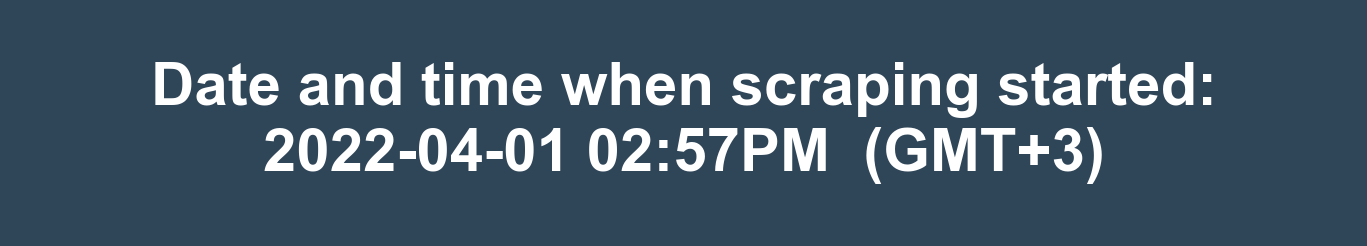

In [ ]:
fig, ax = plt.subplots(figsize=(12, 2), facecolor=facecolor)

ax.text(0.5,
        0.5,
        s='Date and time when scraping started:\n' + today.strftime('%Y-%m-%d %I:%M%p') + '  (UK)',
        size=font_size + 8,
        color='w',
        weight='bold',
        ha='center',
        va='center')

ax.axis('off');

<br>

## Countries Present In The Dataset

In [ ]:
no_countries = df['Country'].nunique()
print('There are {} countries in the dataset.'.format(no_countries))

There are 68 countries in the dataset.


In [ ]:
df_countries = pd.DataFrame({'Country': df['Country'].unique()})

fig = px.choropleth(df_countries,
                    locations='Country',
                    color_discrete_sequence=np.full(no_countries, 'lightcoral'),
                    locationmode='country names',
                    fitbounds='locations')

fig.update_layout(width=800,
                  plot_bgcolor=facecolor,
                  paper_bgcolor=facecolor,
                  geo=dict(bgcolor=facecolor,
                           landcolor='#375167',
                           showlakes=False,
                           showocean=True,
                           oceancolor=facecolor),
                  title={
                      'text':
                      'Countries With At Least One Company In The Dataset',
                      'x': 0.5,
                      'xanchor': 'center',
                      'y': 0.95,
                      'font': {'color': 'white', 'size': 27, 'family': 'Arial'}
                  },
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0})

fig.update_traces(showlegend=False)
fig.update_geos(resolution=50, visible=True)

fig.show(renderer='svg');

Most countries in America, Europe, and Asia are represented in the dataset. However, we should note that our dataset does not include all countries with a stock exchange. For instance, Iran has the [Tehran Stock Exchange](https://en.wikipedia.org/wiki/Tehran_Stock_Exchange) but it is absent from the dataset. This observation could be due to the unavailability of data from such countries/exchanges.

<br>

## Top 10 Countries With The Most Companies

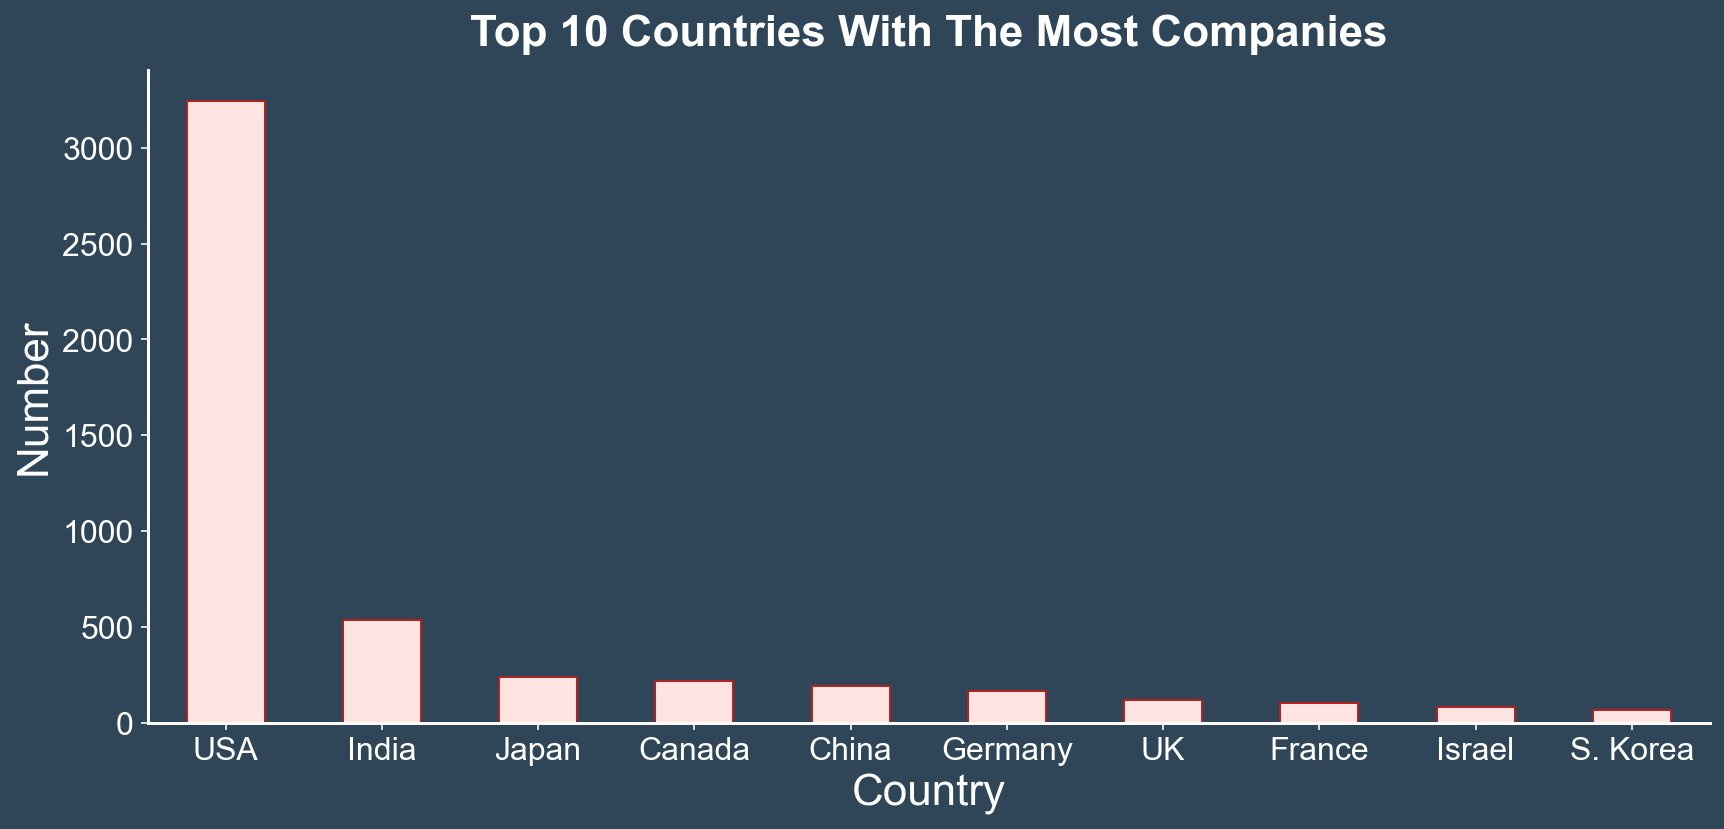

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor=facecolor)

df['Country'].value_counts().head(10).plot(kind='bar',
                                           color='mistyrose',
                                           edgecolor='firebrick',
                                           ax=ax)

ax.set_title('Top 10 Countries With The Most Companies', y=1.02)
ax.set(xlabel='Country', ylabel='Number')
ax.tick_params(axis='x', labelrotation=0);

The USA has the highest number of companies as more than 3,000 companies trade there. In comparison, India, the country with the second-highest number of publicly traded companies, has a little over 500 companies.

<br>

## Top 10 Countries In Terms Of Total Market Capitalisation

In [ ]:
df_total_mc = df.groupby('Country')['Market Cap'].sum().to_frame()
df_total_mc.sort_values(by='Market Cap', ascending=False, inplace=True)

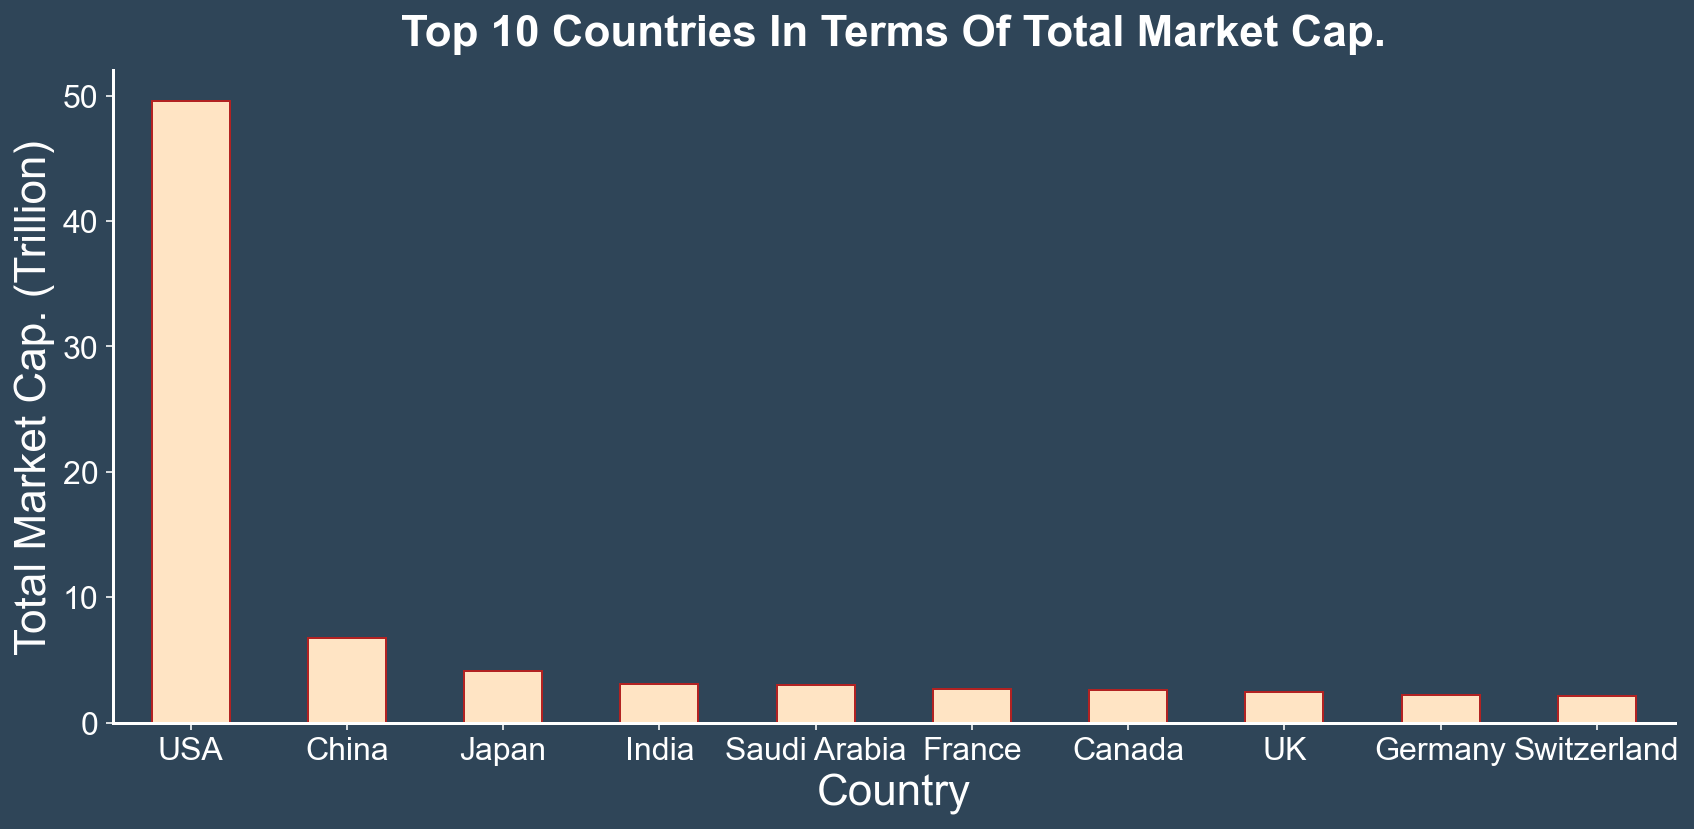

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor=facecolor)

df_total_mc.head(10).plot(kind='bar',
                          color='bisque',
                          edgecolor='firebrick',
                          ax=ax)

ax.set_title('Top 10 Countries In Terms Of Total Market Cap.', y=1.02)
ax.set(xlabel='Country', ylabel='Total Market Cap. (Trillion)')

scale_y = 1e12
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

ax.tick_params(axis='x', labelrotation=0)
ax.get_legend().remove();

The USA has the largest total market capitalisation (almost 50 trillion), exceeding the second country (China) by more than seven times. Note that India is fourth in terms of total market cap (behind China and Japan), even though it ranked second in terms of the total number of companies. This observation could potentially mean that Indian companies are not valued as much as those in China and Japan.

We can also compare the USA with all remaining countries combined.

In [ ]:
usa_comparison = pd.DataFrame({
    'USA': df_total_mc.iloc[0],
    'Rest of the World': df_total_mc.iloc[1:].sum()}).T

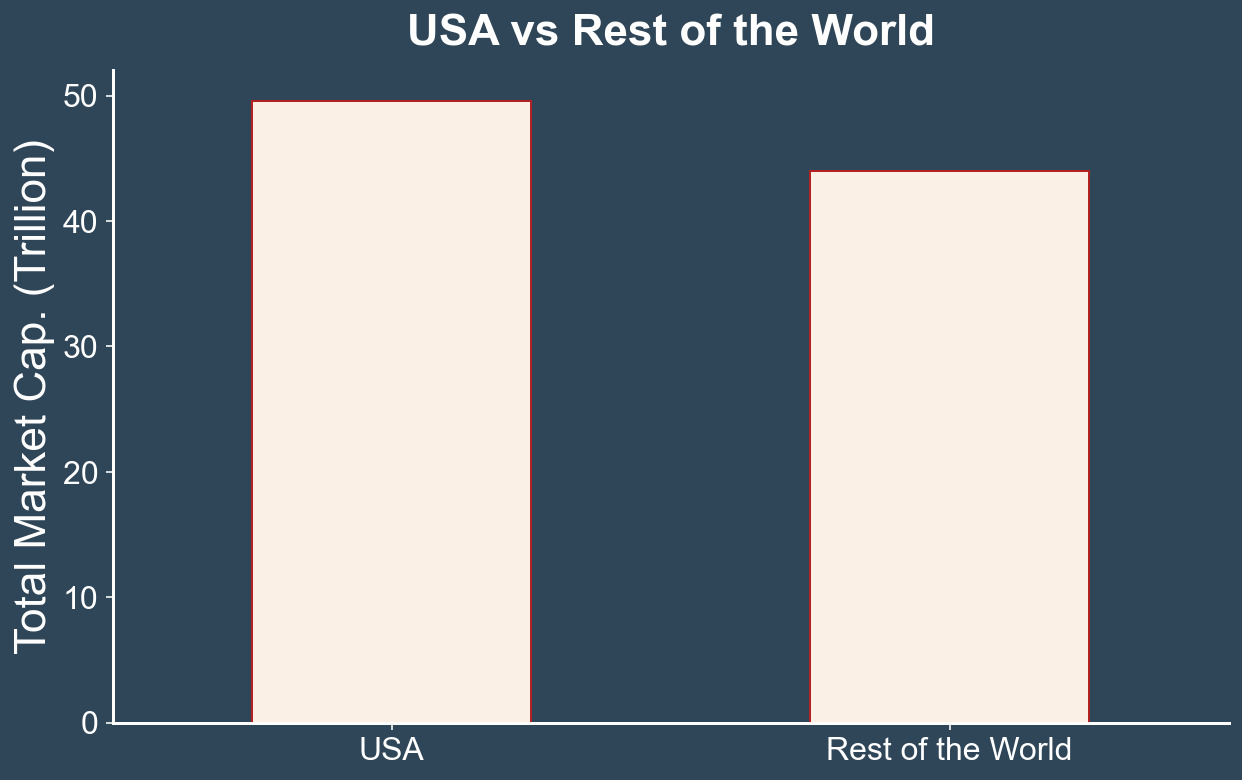

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

usa_comparison.plot(kind='bar', color='linen', edgecolor='firebrick', ax=ax)

ax.set_title('USA vs Rest of the World', y=1.02)
ax.set(ylabel='Total Market Cap. (Trillion)')

scale_y = 1e12
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

ax.tick_params(axis='x', labelrotation=0)
ax.get_legend().remove();

Interestingly, the total market capitalisation of all countries is comparable but still less than that of the USA alone.

<br>

## Dependencies

In [ ]:
import watermark
%load_ext watermark

# See version of system, Python, and libraries
%watermark -n -v -m -iv

import bs4
print('bs4       :', bs4.__version__)

Python implementation: CPython
Python version       : 3.10.2
IPython version      : 8.0.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit

json      : 2.0.9
pandas    : 1.4.1
plotly    : 5.6.0
requests  : 2.27.1
numpy     : 1.22.2
seaborn   : 0.11.2
watermark : 2.3.0
matplotlib: 3.5.1

bs4       : 4.10.0


<br>

# References

* Web Scraping

    [1] [Web Scraping and API Fundamentals in Python 2021](https://www.udemy.com/course/web-scraping-and-api-fundamentals-in-python/) course on [Udemy](https://www.udemy.com/) (Completed in May 2021)
    
    [2] [Tutorial: Web Scraping and BeautifulSoup](https://www.dataquest.io/blog/web-scraping-beautifulsoup/) by Sahil Sunny on [Dataquest](https://www.dataquest.io/) (Accessed: 25/05/2021)
    
    [3] [A Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/) by David Amos on [Real Python](https://realpython.com/) (Accessed: 24/05/2021)

    [4] [How we learnt to stop worrying and love web scraping](https://www.nature.com/articles/d41586-020-02558-0) by Nicholas DeVito, Georgia Richards and Peter Inglesby on [nature](https://www.nature.com/) (Accessed: 20/05/2021)
    
    [5] [A Beginner’s Guide to learn web scraping with python!](https://www.edureka.co/blog/web-scraping-with-python/) by Omkar S Hiremath on [Edureka](https://www.edureka.co/) (Accessed: 20/05/2021)

<br>

* HTML

    [1] [Extracting Data from HTML with BeautifulSoup](https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup) by Gaurav Singhal on [Pluralsight](https://www.pluralsight.com/) (Accessed: 25/05/2021)
    
    [2] [What is HTML? The Basics of Hypertext Markup Language Explained](https://www.hostinger.co.uk/tutorials/what-is-html) by Susan Curtis on [Hostinger](https://www.hostinger.co.uk/) (Accessed: 24/05/2021)
    
    [3] [Learn HTML: Elements and Structure](https://www.codecademy.com/learn/learn-html/modules/learn-html-elements/cheatsheet), a cheatsheed from [Codecademy](https://www.codecademy.com/) (Accessed: 25/05/2021)

<br>

# Conclusions

Our notebook came to an end. In summary, we learned how to:

- Send an HTTP request to the server of a web page,
- Create a parse tree and navigate it to find the information we need,
- Scale our approach from scraping a single row from a single page to scraping multiple rows from multiple pages, and
- Use the scraped dataset to visualise the data.

<br>